In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load the image
image = cv2.imread(r"/home/snucse/Test-slanted.jpg", 0)

## Q2. A) Filtering techniques to improve contrast; Gamma Transformation

In [18]:
# Trying 4 gamma values. 
for gamma in [0.5, 1.0, 1.5, 2.0]:
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(image / 255) ** gamma, dtype = 'uint8') 

    # Save edited images. 
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected) 

## Q2. B) Generate and plot histogram of the original image

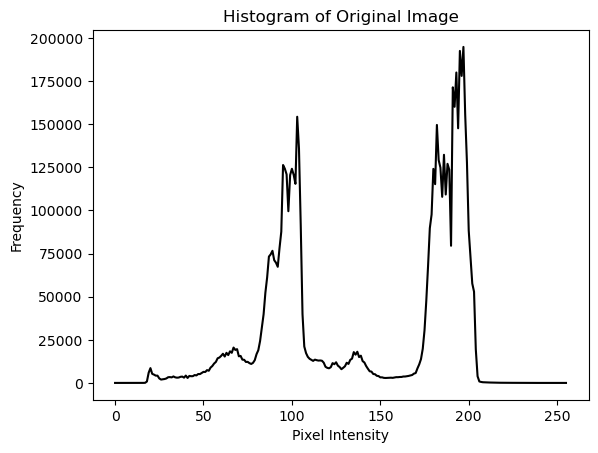

In [6]:
hist, bins = np.histogram(image.flatten(), 256, [0, 256])

plt.plot(hist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Original Image')
plt.show()

## Q2. C) Apply Histogram Equalization and Matching

In [7]:
# Histogram equalization to improve contrast
equalized_image = cv2.equalizeHist(image)

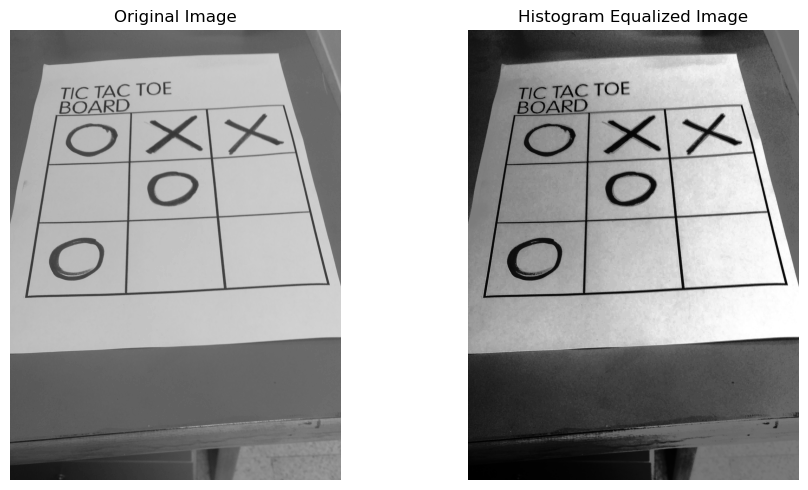

In [8]:
# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
def save_image(image, filename):
    cv2.imwrite(filename, image)

save_image(equalized_image,r"/home/snucse/equalized_image.jpg")

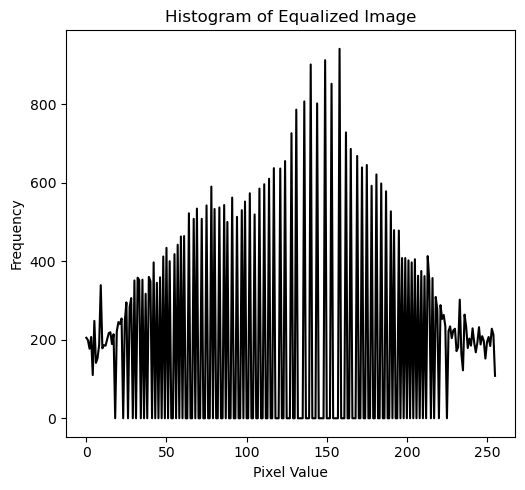

In [44]:
# Histogram of equalized image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.plot(hist_equalized, color='black')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
# Apply histogram matching with the equalized image as the reference image

reference_image = cv2.imread(r"/home/snucse/equalized_image.jpg", 0)
matched_image = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(image, reference_image)

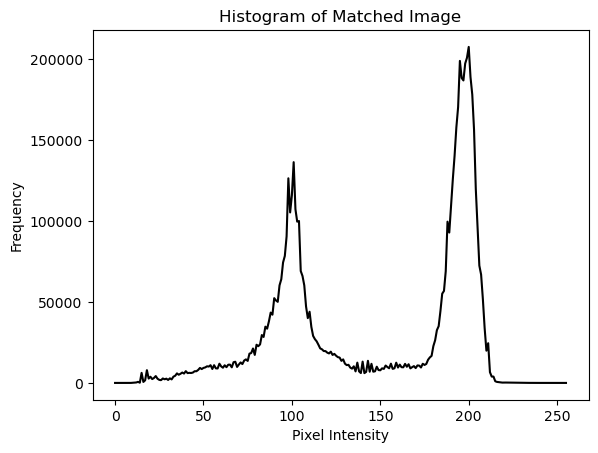

In [11]:
# Generate and Plot histogram

matched_hist, _ = np.histogram(matched_image.flatten(), 256, [0, 256])

plt.plot(matched_hist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Matched Image')
plt.show()